<a href="https://colab.research.google.com/github/Mang9ae/AI_Aplication/blob/main/4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None
  # 곱셈 z = x*y
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  def backward(self, dout):
    dx = dout * self.y # x와 y를 바꾼다.
    dy = dout * self.x
    return dx, dy

apple = 100
apple_num = 2
tax = 1.1
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, apple_num, dtax)

220.00000000000003
2.2 2 200


In [3]:
import os

if not os.path.exists("dataset/mnist.py"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/mnist.py
if not os.path.exists("dataset/train-images-idx3-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-images-idx3-ubyte.gz
if not os.path.exists("dataset/train-labels-idx1-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-labels-idx1-ubyte.gz
if not os.path.exists("dataset/t10k-images-idx3-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-images-idx3-ubyte.gz
if not os.path.exists("dataset/t10k-labels-idx1-ubyte.gz"):
    !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-labels-idx1-ubyte.gz
#확인
!realpath dataset/mnist.py
!ls dataset

--2025-03-25 10:38:45--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3655 (3.6K) [text/plain]
Saving to: ‘dataset/mnist.py’

mnist.py            100%[===================>]   3.57K  --.-KB/s    in 0s      

2025-03-25 10:38:45 (48.1 MB/s) - ‘dataset/mnist.py’ saved [3655/3655]

--2025-03-25 10:38:46--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [4]:
#sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 각 데이터 shape 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


(784,)
5


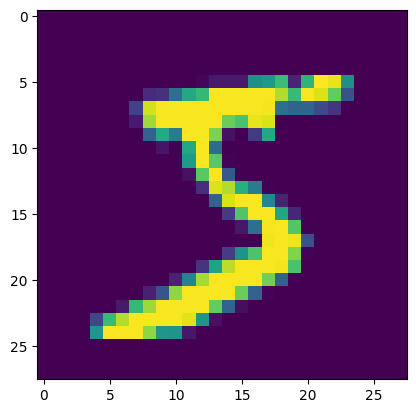

In [7]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  #pil_img.show()
  plt.imshow(np.array(pil_img))
img = x_train[0]
print(img.shape)
label = t_train[0]
img = img.reshape(28, 28)
img_show(img)
print(label)

In [10]:
import sys, os
if not os.path.exists("dataset/mnist.py"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/mnist.py
if not os.path.exists("common/functions.py"):
  !wget -P common https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/common/functions.py
if not os.path.exists("dataset/train-images-idx3-ubyte.gz"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-images-idx3-ubyte.gz
if not os.path.exists("dataset/train-labels-idx1-ubyte.gz"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/train-labels-idx1-ubyte.gz
if not os.path.exists("dataset/t10k-images-idx3-ubyte.gz"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-images-idx3-ubyte.gz
if not os.path.exists("dataset/t10k-labels-idx1-ubyte.gz"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/t10k-labels-idx1-ubyte.gz

#sample weight 추가
if not os.path.exists("dataset/sample_weight.pkl"):
  !wget -P dataset https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/sample_weight.pkl

#확인
!realpath dataset/mnist.py
!ls dataset

--2025-03-25 10:54:53--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/common/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1075 (1.0K) [text/plain]
Saving to: ‘common/functions.py’

functions.py        100%[===================>]   1.05K  --.-KB/s    in 0s      

2025-03-25 10:54:53 (68.3 MB/s) - ‘common/functions.py’ saved [1075/1075]

--2025-03-25 10:54:53--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/NNBasic/005_minist/dataset/sample_weight.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [14]:
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
import numpy as np
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("dataset/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  return y

# 추론 및 정확도 계산
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [17]:
# TwoLayerNet 클래스 정의
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
# 예측 함수 정의
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y
# Loss 함수
  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)
# 정확도 측정 함수
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
# 가중치 매개변수의 기울기
  # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads

In [18]:
# MNIST 데이터 읽기
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from TwoLayerNet import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

#losss 및 정확도 변수
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 모델 생성 및 반복 학습
for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

# 기울기 계산
#grad = network.numerical_gradient(x_batch, t_batch)
grad = network.gradient(x_batch, t_batch)

# 매개변수 갱신
for key in ('W1', 'b1', 'W2', 'b2'):
  network.params[key] -= learning_rate * grad[key]

# 학습 경과 기록
loss = network.loss(x_batch, t_batch)
train_loss_list.append(loss)

# 1에폭당 정확도 계산
if i % iter_per_epoch == 0:
  train_acc = network.accuracy(x_train, t_train)
  test_acc = network.accuracy(x_test, t_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.xlim(0, 10000)
plt.show()

# 정확도 그래프 그리기
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()


ModuleNotFoundError: No module named 'TwoLayerNet'